In [1]:
import os
from imutils import paths
from random import shuffle
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import  Conv2D, MaxPooling2D, Activation
##comentario

In [2]:
diretorio = './CHILDADULTDATASET/test'

print("Carregando labels...")
label_dict = {} #criando um dicionario para poder mapear as classes 

print(os.listdir(diretorio))
print(sorted(os.listdir(diretorio)))
print(list(enumerate(sorted(os.listdir(diretorio))))) #coloca em ordem alfabetica 


for i, d in enumerate(sorted(os.listdir(diretorio))): # cria uma tupla onde cada indice corresponde a uma classe
    label_dict[d] = i

print(label_dict)
num_classes = len(label_dict) 

print(list(paths.list_images(diretorio))) #lista o caminho dos arquivos 

Carregando labels...
['adults', 'children']
['adults', 'children']
[(0, 'adults'), (1, 'children')]
{'adults': 0, 'children': 1}
['./CHILDADULTDATASET/test\\adults\\100_jpg.rf.836b8c0eb859a72cf08704ca07500737.jpg', './CHILDADULTDATASET/test\\adults\\119_jpg.rf.87ce5bbd410f6db7ce3a5908e94e428a.jpg', './CHILDADULTDATASET/test\\adults\\11_jpg.rf.3e060625d8ed81cd2c1f97d63ac407d5.jpg', './CHILDADULTDATASET/test\\adults\\135_jpg.rf.98af875868ac9a8773723e118877b448.jpg', './CHILDADULTDATASET/test\\adults\\141_jpg.rf.6845d74651b9c65483d54c2fb156e6b4.jpg', './CHILDADULTDATASET/test\\adults\\147_jpg.rf.ebce5136f9ea954a10411f4270d8c154.jpg', './CHILDADULTDATASET/test\\adults\\159_jpg.rf.e716f28ba270dca9e4d3521f4a9738da.jpg', './CHILDADULTDATASET/test\\adults\\163_jpg.rf.f117de0c86a396e8ed431ff22b30aad8.jpg', './CHILDADULTDATASET/test\\adults\\176_jpg.rf.9b364e672bc766aa546f4f08c819fc7e.jpg', './CHILDADULTDATASET/test\\adults\\177_jpg.rf.05d4136ea786ac55818bfd0915fcf34b.jpg', './CHILDADULTDATASET/

In [3]:

"""print("Carregando imagens...")
dataTeste = []
dataTreino = []
labelsTeste = []
labelsTreino = []
imagensCaminho = sorted(list(paths.list_images(diretorio)))
#print(sorted(list(paths.list_images(diretorio))))
shuffle(imagensCaminho)
print("caminho: ", imagensCaminho)


for imagemCaminho in tqdm(imagensCaminho):
    image = cv2.imread(imagemCaminho)
    #plt.imshow(image)
    #plt.show()
    image = cv2.resize(image, (28,28))
    #plt.imshow(image)
    #plt.show()
    #break
    dataTeste.append(image)
    dataTreino.append(image)
    #print(imagemCaminho.split(os.path.sep))
    labelTeste = label_dict[imagemCaminho.split(os.path.sep)[-2]] 
    labelTreino = label_dict[imagemCaminho.split(os.path.sep)[-2]]
    labelsTeste.append(labelTeste)
    labelsTreino.append(labelTreino)

print(len(dataTeste))
print(len(dataTreino))
"""

'print("Carregando imagens...")\ndataTeste = []\ndataTreino = []\nlabelsTeste = []\nlabelsTreino = []\nimagensCaminho = sorted(list(paths.list_images(diretorio)))\n#print(sorted(list(paths.list_images(diretorio))))\nshuffle(imagensCaminho)\nprint("caminho: ", imagensCaminho)\n\n\nfor imagemCaminho in tqdm(imagensCaminho):\n    image = cv2.imread(imagemCaminho)\n    #plt.imshow(image)\n    #plt.show()\n    image = cv2.resize(image, (28,28))\n    #plt.imshow(image)\n    #plt.show()\n    #break\n    dataTeste.append(image)\n    dataTreino.append(image)\n    #print(imagemCaminho.split(os.path.sep))\n    labelTeste = label_dict[imagemCaminho.split(os.path.sep)[-2]] \n    labelTreino = label_dict[imagemCaminho.split(os.path.sep)[-2]]\n    labelsTeste.append(labelTeste)\n    labelsTreino.append(labelTreino)\n\nprint(len(dataTeste))\nprint(len(dataTreino))\n'

In [4]:
def loadData(diretorios):
    imagensCaminho = sorted(list(paths.list_images(diretorios)))
    data = []
    labelData = []
    for imagemCaminho in tqdm(imagensCaminho):
        image = cv2.imread(imagemCaminho)
        image = cv2.resize(image, (28,28))
        data.append(image)
        labelTeste = label_dict[imagemCaminho.split(os.path.sep)[-2]] 
        labelData.append(labelTeste)
    return data, labelData

In [5]:
dataTreino, labelsTreino = loadData('./CHILDADULTDATASET/train')
dataTeste, labelsTeste = loadData('./CHILDADULTDATASET/test')
dataVal, labelsVal = loadData('./CHILDADULTDATASET/val')

print(len(labelsTreino))
print(len(labelsTeste))


  1%|          | 4/557 [00:00<00:15, 36.28it/s]

100%|██████████| 158/158 [00:03<00:00, 48.35it/s]

557
82


In [6]:
dataTeste = np.array(dataTeste) # 0 - 255
print(dataTeste[0].shape)
dataTreino = np.array(dataTreino) # 0 - 255
print(dataTreino[0].shape)
dataVal = np.array(dataVal) # 0 - 255
print(dataTreino[0].shape)
labelsTeste = np.array(labelsTeste)
labelsTreino = np.array(labelsTreino)
labelsVal = np.array(labelsVal)

# particionar os dados entre teste e treinamento
#(trainX, testX, trainY, testY) = train_test_split(
#    data, labels, test_size=0.25, random_state=42)


# Further split the training data into training and validation sets
#dataTreino, X_val, labelsTreino, y_val = train_test_split(dataTreino, labelsTreino, test_size=0.25, random_state=42)
valX, valY = dataVal, to_categorical(labelsVal, num_classes=num_classes)

(trainX, testX, trainY, testY) = dataTreino, dataTeste, labelsTreino, labelsTeste
print(len(trainX), len(dataTreino))
print(len(testX), len(dataTeste))
print(len(trainY), len(labelsTreino))
print(len(testY), len(labelsTeste))

testYOriginal = testY[:]
trainY = to_categorical(trainY, num_classes=num_classes)
testY = to_categorical(testY, num_classes=num_classes) #vai transformar adulto/criança em zero e um
print(len(trainX), len(dataTreino))
print(len(testX), len(dataTeste))
print(len(trainY), len(labelsTreino))
print(len(testY), len(labelsTeste))



(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
557 557
82 82
557 557
82 82
557 557
82 82
557 557
82 82


In [7]:
#testY
trainY

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [8]:
#LeNet
'''print("Criação do modelo - CNN:")
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(28, 28, 3), strides=(1, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(5, 5), strides=(1, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))'''


'print("Criação do modelo - CNN:")\nmodel = Sequential()\n\nmodel.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(28, 28, 3), strides=(1, 1), padding=\'same\'))\nmodel.add(Activation(\'relu\'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n\nmodel.add(Conv2D(filters=64, kernel_size=(5, 5), strides=(1, 1), padding=\'same\'))\nmodel.add(Activation(\'relu\'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n\nmodel.add(Dropout(0.5))\nmodel.add(Flatten())\nmodel.add(Dense(200, activation=\'relu\'))\nmodel.add(Dropout(0.25))\nmodel.add(Dense(num_classes, activation=\'softmax\'))'

In [9]:
#AlexNet
print("Criação do modelo - CNN:")
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(11, 11), input_shape=(28, 28, 3), strides=(1, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(filters=64, kernel_size=(5, 5), strides=(1, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))


model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))


Criação do modelo - CNN:


In [10]:
#VGG-16
'''print("Criação do modelo - CNN:")
model = Sequential()

  model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28, 28, 3), strides=(1, 1), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

  model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

  model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

  model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

  model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(200, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(num_classes, activation='softmax'))
'''

'print("Criação do modelo - CNN:")\nmodel = Sequential()\n\n  model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28, 28, 3), strides=(1, 1), padding=\'same\'))\n  model.add(Activation(\'relu\'))\n  model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding=\'same\'))\n  model.add(Activation(\'relu\'))\n  model.add(MaxPooling2D(pool_size=(2, 2), padding=\'same\'))\n\n  model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding=\'same\'))\n  model.add(Activation(\'relu\'))\n  model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding=\'same\'))\n  model.add(Activation(\'relu\'))\n  model.add(MaxPooling2D(pool_size=(2, 2),padding=\'same\'))\n\n  model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding=\'same\'))\n  model.add(Activation(\'relu\'))\n  model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding=\'same\'))\n  model.add(Activation(\'relu\'))\n  model.add(Conv2D(filters=64, kernel_size=(3, 3), str

In [11]:
model.compile(
    optimizer='adam',
    loss= 'categorical_crossentropy',
    metrics=['categorical_accuracy']
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        23296     
                                                                 
 activation (Activation)     (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 9, 9, 64)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          102464    
                                                                 
 activation_1 (Activation)   (None, 9, 9, 64)          0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 64)          0         
 g2D)                                                   

In [13]:
#X_val.shape, dataTreino.shape

In [14]:
#y_val.shape, labelsTreino.shape

(557, 28, 28, 3)
(557, 2)
(82, 28, 28, 3)
(82, 2)
Criação do modelo - CNN:


------------------------------------------------------------------------
Training for fold 1 ...
Treinamento do modelo...
Epoch 1/250
6/6 [==============================] - 5s 304ms/step - loss: 4.4486 - categorical_accuracy: 0.5009 - val_loss: 0.7379 - val_categorical_accuracy: 0.4810
Epoch 2/250
6/6 [==============================] - 1s 198ms/step - loss: 0.8626 - categorical_accuracy: 0.4740 - val_loss: 0.6986 - val_categorical_accuracy: 0.5000
Epoch 3/250
6/6 [==============================] - 1s 205ms/step - loss: 0.7096 - categorical_accuracy: 0.5045 - val_loss: 0.6947 - val_categorical_accuracy: 0.4873
Epoch 4/250
6/6 [==============================] - 1s 194ms/step - loss: 0.7021 - categorical_accuracy: 0.4829 - val_loss: 0.6960 - val_categorical_accuracy: 0.4620
Epoch 5/250
6/6 [==============================] - 1s 206ms/step - loss: 0.6949 - categorical_accuracy: 0.4919 - val_loss: 0.6951 - val_categorical_accuracy: 0.4494
Epoch 6/250
6/6 [==============================] - 1s

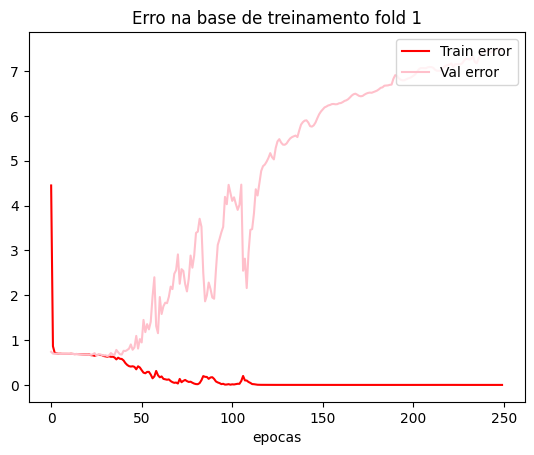

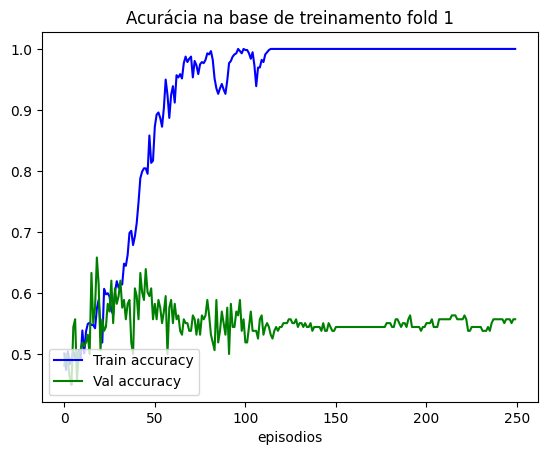

3/3 [==============================] - 0s 22ms/step
              precision    recall  f1-score   support

           0       0.49      0.64      0.55        33
           1       0.69      0.55      0.61        49

    accuracy                           0.59        82
   macro avg       0.59      0.59      0.58        82
weighted avg       0.61      0.59      0.59        82

Score for fold 1: loss of 1.0027116537094116; categorical_accuracy of 95.3125%
Criação do modelo - CNN:
------------------------------------------------------------------------
Training for fold 2 ...
Treinamento do modelo...
Epoch 1/250
6/6 [==============================] - 4s 309ms/step - loss: 4.7117 - categorical_accuracy: 0.5260 - val_loss: 0.8199 - val_categorical_accuracy: 0.4873
Epoch 2/250
6/6 [==============================] - 1s 198ms/step - loss: 0.9414 - categorical_accuracy: 0.4794 - val_loss: 0.6951 - val_categorical_accuracy: 0.4747
Epoch 3/250
6/6 [==============================] - 1s 193ms/step 

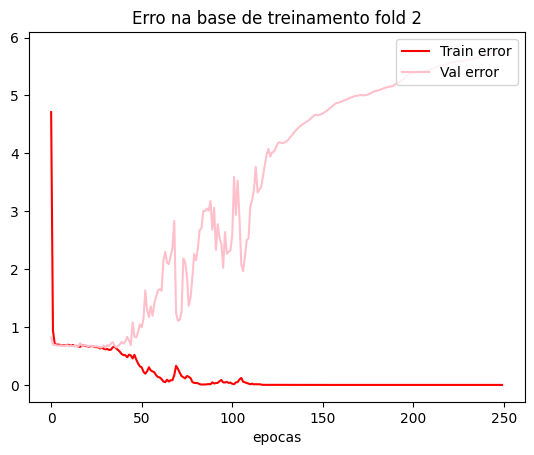

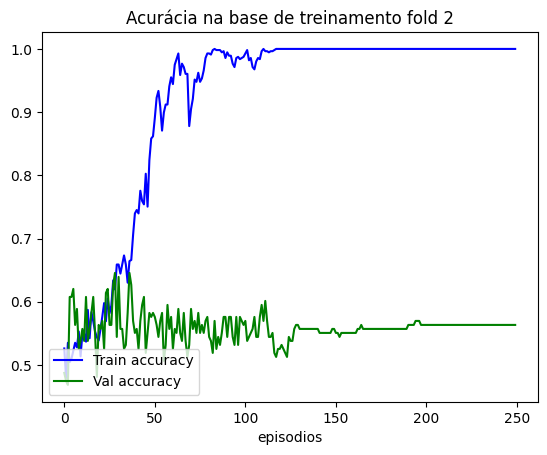

3/3 [==============================] - 0s 19ms/step
              precision    recall  f1-score   support

           0       0.53      0.70      0.61        33
           1       0.74      0.59      0.66        49

    accuracy                           0.63        82
   macro avg       0.64      0.64      0.63        82
weighted avg       0.66      0.63      0.64        82

Score for fold 2: loss of 0.40488582849502563; categorical_accuracy of 96.875%
Criação do modelo - CNN:
------------------------------------------------------------------------
Training for fold 3 ...
Treinamento do modelo...
Epoch 1/250
6/6 [==============================] - 4s 271ms/step - loss: 4.3892 - categorical_accuracy: 0.4901 - val_loss: 0.7219 - val_categorical_accuracy: 0.4937
Epoch 2/250
6/6 [==============================] - 1s 193ms/step - loss: 0.9488 - categorical_accuracy: 0.4811 - val_loss: 0.6954 - val_categorical_accuracy: 0.5127
Epoch 3/250
6/6 [==============================] - 1s 188ms/step 

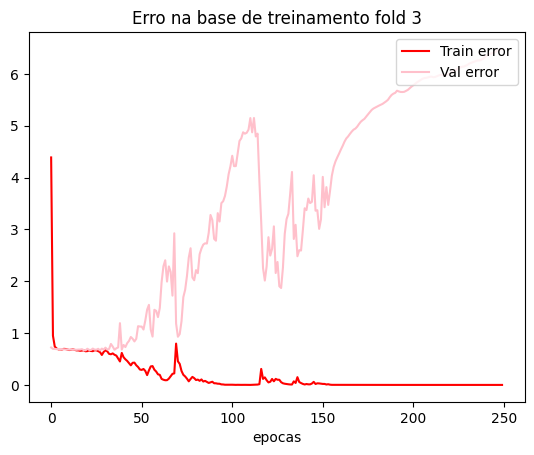

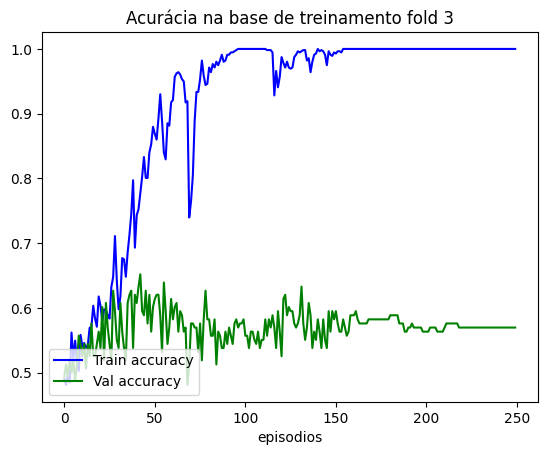

3/3 [==============================] - 0s 17ms/step
              precision    recall  f1-score   support

           0       0.41      0.45      0.43        33
           1       0.60      0.55      0.57        49

    accuracy                           0.51        82
   macro avg       0.50      0.50      0.50        82
weighted avg       0.52      0.51      0.52        82

Score for fold 3: loss of 1.0862542390823364; categorical_accuracy of 92.96875%
Criação do modelo - CNN:
------------------------------------------------------------------------
Training for fold 4 ...
Treinamento do modelo...
Epoch 1/250
6/6 [==============================] - 4s 258ms/step - loss: 5.3791 - categorical_accuracy: 0.4991 - val_loss: 0.7160 - val_categorical_accuracy: 0.5063
Epoch 2/250
6/6 [==============================] - 1s 191ms/step - loss: 1.1108 - categorical_accuracy: 0.5027 - val_loss: 0.6887 - val_categorical_accuracy: 0.5190
Epoch 3/250
6/6 [==============================] - 1s 191ms/step

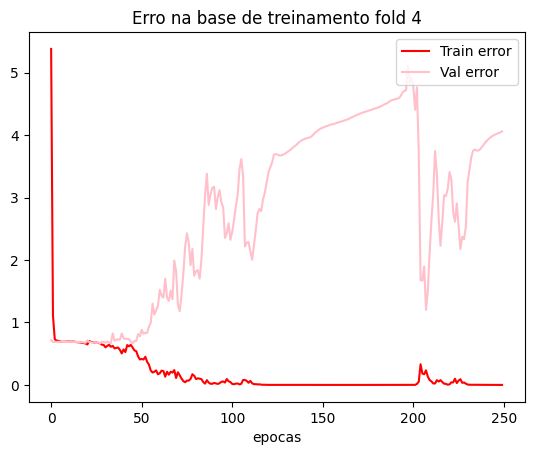

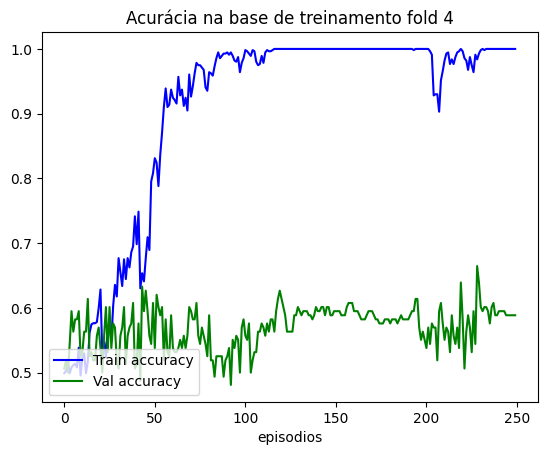

3/3 [==============================] - 0s 30ms/step
              precision    recall  f1-score   support

           0       0.37      0.42      0.39        33
           1       0.57      0.51      0.54        49

    accuracy                           0.48        82
   macro avg       0.47      0.47      0.47        82
weighted avg       0.49      0.48      0.48        82

Score for fold 4: loss of 0.5355127453804016; categorical_accuracy of 92.96875%
Criação do modelo - CNN:
------------------------------------------------------------------------
Training for fold 5 ...
Treinamento do modelo...
Epoch 1/250
6/6 [==============================] - 6s 318ms/step - loss: 2.6355 - categorical_accuracy: 0.4722 - val_loss: 0.6980 - val_categorical_accuracy: 0.4747
Epoch 2/250
6/6 [==============================] - 1s 194ms/step - loss: 0.7541 - categorical_accuracy: 0.4991 - val_loss: 0.6877 - val_categorical_accuracy: 0.5253
Epoch 3/250
6/6 [==============================] - 1s 192ms/step

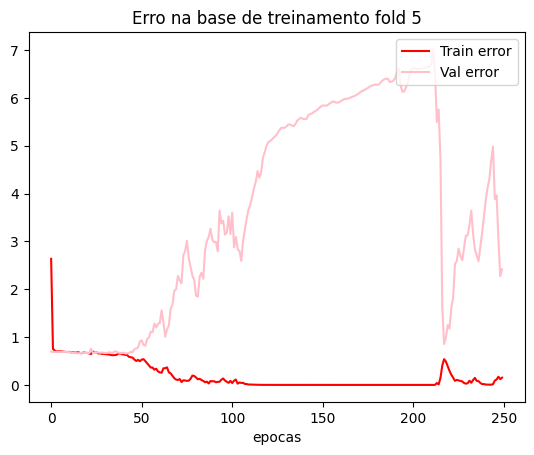

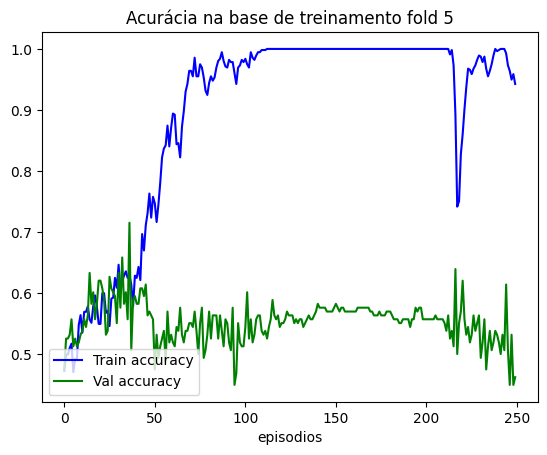

3/3 [==============================] - 0s 27ms/step
              precision    recall  f1-score   support

           0       0.52      0.76      0.62        33
           1       0.76      0.53      0.63        49

    accuracy                           0.62        82
   macro avg       0.64      0.64      0.62        82
weighted avg       0.67      0.62      0.62        82

Score for fold 5: loss of 0.19804053008556366; categorical_accuracy of 96.0629940032959%


In [15]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

inputs = np.concatenate((trainX, testX))
targets = np.concatenate((trainY, testY))
acc_per_fold = []
loss_per_fold = []


kf = KFold(n_splits=5, shuffle=True) #vai treinar 5x 

fold_no = 1
for train, test in kf.split(inputs, targets):
  print("Criação do modelo - CNN:")
  model = Sequential()

  model.add(Conv2D(filters=64, kernel_size=(11, 11), input_shape=(28, 28, 3), strides=(1, 1), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(3, 3)))

  model.add(Conv2D(filters=64, kernel_size=(5, 5), strides=(1, 1), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(3, 3)))

  model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(3, 3)))


  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(200, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(num_classes, activation='softmax'))  



  model.compile(
    optimizer='adam',
    loss= 'categorical_crossentropy',
    metrics=['categorical_accuracy']
  )

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')



  batch = 100
  epochs = 250

  print("Treinamento do modelo...")
  h = model.fit(
      trainX,
      trainY,
      validation_data=(valX, valY),
      #validation_split=0.2,
      batch_size = batch,
      epochs = epochs,
  )

  plt.plot(h.history['loss'], label='Train error', c="red")
  plt.plot(h.history['val_loss'], label='Val error', c="pink")
  plt.xlabel('epocas')
  plt.legend(loc='upper right')
  plt.title("Erro na base de treinamento fold %d" % fold_no)
  plt.savefig("Erro na base de treinamento fold %d.png" % fold_no)
  plt.show()
  plt.plot(h.history['categorical_accuracy'], label='Train accuracy', c="blue")
  plt.plot(h.history['val_categorical_accuracy'], label='Val accuracy', c="green")
  plt.xlabel('episodios')
  plt.legend(loc='lower left')
  plt.title("Acurácia na base de treinamento fold %d" % fold_no)
  plt.savefig("Acurácia na base de treinamento fold %d.png" % fold_no)
  plt.show()


  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  

  prediction = model.predict(testX)
  #print(prediction)
  resposta = np.argmax(prediction, axis=1)
  print(classification_report(testYOriginal,resposta))
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])


  # Increase fold number
  fold_no = fold_no + 1



In [16]:
print(acc_per_fold)
print(np.mean(acc_per_fold))
print(loss_per_fold)
print(np.mean(loss_per_fold))

#verificar se as imagens estao salvas e ver a media 

[95.3125, 96.875, 92.96875, 92.96875, 96.0629940032959]
94.83759880065918
[1.0027116537094116, 0.40488582849502563, 1.0862542390823364, 0.5355127453804016, 0.19804053008556366]
0.6454809993505478


In [17]:
batch = 100
epochs = 250

print("Treinamento do modelo...")
h = model.fit(
    trainX,
    trainY,
    #validation_data=(X_val, y_val),
    validation_split=0.2,
    batch_size = batch,
    epochs = epochs,
)

Treinamento do modelo...


Epoch 1/250
5/5 [==============================] - 1s 255ms/step - loss: 0.0962 - categorical_accuracy: 0.9618 - val_loss: 0.1890 - val_categorical_accuracy: 0.9196
Epoch 2/250
5/5 [==============================] - 1s 224ms/step - loss: 0.0501 - categorical_accuracy: 0.9865 - val_loss: 0.0684 - val_categorical_accuracy: 0.9732
Epoch 3/250
5/5 [==============================] - 1s 228ms/step - loss: 0.0349 - categorical_accuracy: 0.9865 - val_loss: 0.0423 - val_categorical_accuracy: 0.9911
Epoch 4/250
5/5 [==============================] - 1s 224ms/step - loss: 0.0287 - categorical_accuracy: 0.9910 - val_loss: 0.0394 - val_categorical_accuracy: 0.9821
Epoch 5/250
5/5 [==============================] - 1s 208ms/step - loss: 0.0169 - categorical_accuracy: 0.9955 - val_loss: 0.0356 - val_categorical_accuracy: 0.9821
Epoch 6/250
5/5 [==============================] - 1s 200ms/step - loss: 0.0107 - categorical_accuracy: 0.9978 - val_loss: 0.0307 - val_categorical_accuracy: 0.9911
Epoch 7/25

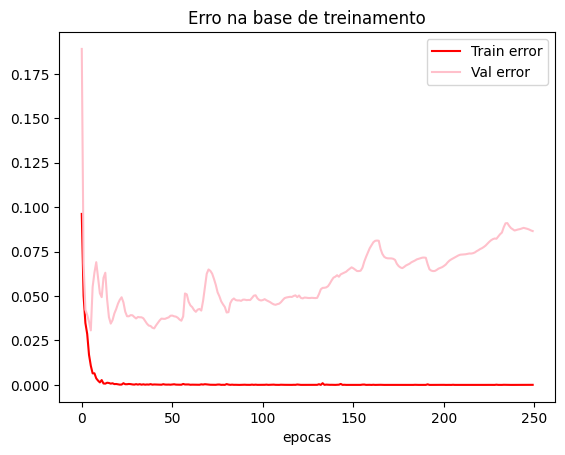

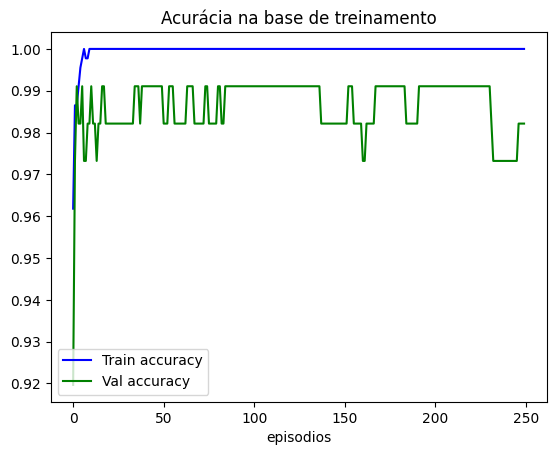

In [18]:
plt.plot(h.history['loss'], label='Train error', c="red")
plt.plot(h.history['val_loss'], label='Val error', c="pink")
plt.xlabel('epocas')
plt.legend(loc='upper right')
plt.title("Erro na base de treinamento")
plt.show()
plt.plot(h.history['categorical_accuracy'], label='Train accuracy', c="blue")
plt.plot(h.history['val_categorical_accuracy'], label='Val accuracy', c="green")
plt.xlabel('episodios')
plt.legend(loc='lower left')
plt.title("Acurácia na base de treinamento")
plt.show()




In [19]:
score = model.evaluate(testX, testY)
print('Erro na base de teste: ', score[0])
print('Acurácia na base de teste: ', score[1])

3/3 [==============================] - 0s 21ms/step - loss: 7.7304 - categorical_accuracy: 0.5976
Erro na base de teste:  7.73037052154541
Acurácia na base de teste:  0.5975610017776489


In [20]:
from sklearn.metrics import classification_report

prediction = model.predict(testX)
#print(prediction)
resposta = np.argmax(prediction, axis=1)
print(classification_report(testYOriginal,resposta))

3/3 [==============================] - 0s 24ms/step
              precision    recall  f1-score   support

           0       0.50      0.64      0.56        33
           1       0.70      0.57      0.63        49

    accuracy                           0.60        82
   macro avg       0.60      0.60      0.59        82
weighted avg       0.62      0.60      0.60        82



1/1 [==============================] - 0s 205ms/step
[[9.9999964e-01 4.0933614e-07]]


Text(0.5, 1.0, '0 : 100.00%')

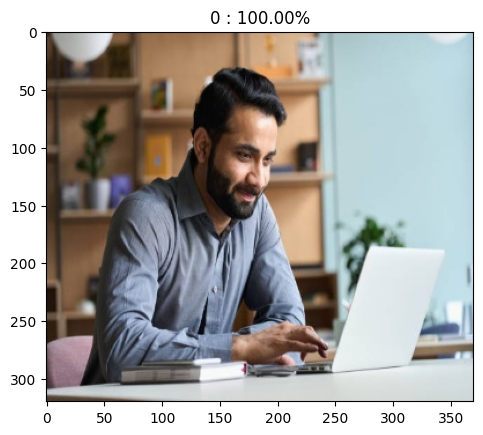

In [21]:
image = cv2.imread('./database/adults/300.jpg')
#image = cv2.imread(diretorio+'./images.jpg')
original = image.copy()

image = cv2.resize(image, (28,28))
image = np.array(image, dtype="int")

image = np.expand_dims(image, axis=0)
pred = model.predict(image)
print(pred)
proba = np.max(pred)
label = np.argmax(pred)
label = "{} : {:.2f}%".format(label, proba*100)

plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title(label)